In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('D:/study docs/Excel R/Data science/assignment/Clustering/Datasets/EastWestAirlines.csv')

In [5]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data2 = data.drop(['ID#'],axis = 1)

In [7]:
data2.shape

(3999, 11)

In [8]:
data_array = data2.values


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)

In [10]:
dbscan = DBSCAN(eps = 1,min_samples = 12)
dbscan.fit(data_scaled)

DBSCAN(eps=1, min_samples=12)

In [11]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
data2['clusters'] = dbscan.labels_

In [13]:
data2['clusters'].value_counts()

 0    2266
 1    1022
-1     711
Name: clusters, dtype: int64

In [14]:
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


<AxesSubplot:xlabel='clusters', ylabel='Balance'>

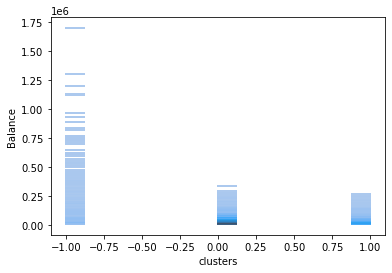

In [15]:
sns.histplot(x = 'clusters', y = 'Balance', data = data2)

<AxesSubplot:xlabel='clusters', ylabel='Bonus_miles'>

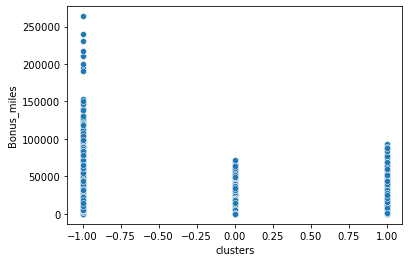

In [16]:
sns.scatterplot(x = 'clusters', y = 'Bonus_miles', data = data2)